<a href="https://colab.research.google.com/github/Aduomas/PP4/blob/main/Practical_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

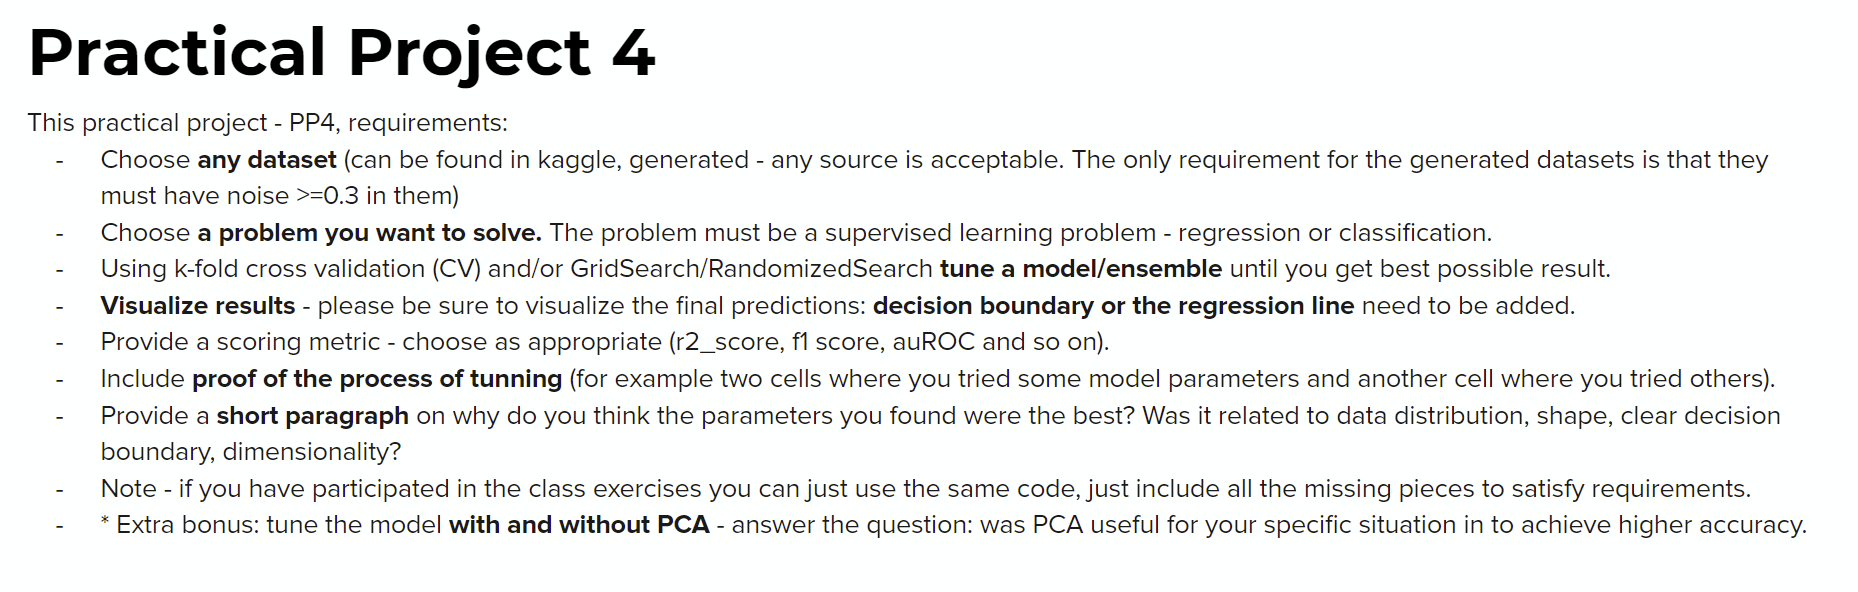


## Choosing a dataset


### https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [ ]:
!wget https://raw.githubusercontent.com/Aduomas/PP4/main/heart.csv

--2021-12-06 19:15:10--  https://raw.githubusercontent.com/Aduomas/PP4/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv.1’

heart.csv.1         100%[===================>]  35.08K  --.-KB/s    in 0.002s  

2021-12-06 19:15:10 (14.7 MB/s) - ‘heart.csv.1’ saved [35921/35921]



In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Classification problem

### Let's encode non-numeric data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Let's use different encoders for inverse transform operations.
sex_lb = LabelEncoder()
df['Sex'] = sex_lb.fit_transform(df['Sex'])
chest_lb = LabelEncoder()
df['ChestPainType'] = chest_lb.fit_transform(df['ChestPainType'])
ecg_lg = LabelEncoder()
df['RestingECG'] = ecg_lg.fit_transform(df['RestingECG'])
angina_lb = LabelEncoder()
df['ExerciseAngina'] = angina_lb.fit_transform(df['ExerciseAngina'])
slope_lb = LabelEncoder()
df['ST_Slope'] = slope_lb.fit_transform(df['ST_Slope'])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Let's make a model for predictions

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

clf = RandomForestClassifier(random_state=0)
random_grid = { 'bootstrap': [True, False],
                'max_depth': [5, 10, 20],
                'n_estimators': [10, 30, 70, 120, 150]}
random_clf = RandomizedSearchCV(clf, random_grid, n_jobs=-1, verbose=2, cv=5)
random_clf.fit(X, Y)
print(random_clf.best_params_)
print(random_clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 120, 'max_depth': 10, 'bootstrap': True}
0.8288904727963885


# I've chosen large amount of estimators, because data is quite complex, there are 11 dimensions, and probably not a single one will determine heart disease alone(proven later). max_depth of 5 - 20 is usually enough for most datasets, without hundreds of features, but I believe that a specific value might improve our results. bootstrap usually helps training, but I want to check that. There isn't any rubbish data, so I believe that every single component, or most of them will bring some value to predictions.

### Let's try to find specific max_depth around 10

In [ ]:
clf = RandomForestClassifier(random_state=0)
random_grid = { 'bootstrap': [True],
                'max_depth': [7, 8, 9, 10, 11],
                'n_estimators': [100, 110, 120, 130],
                'min_samples_split': [2,3,4],
               'min_samples_leaf':[1,2,3,4]
               }
random_clf = RandomizedSearchCV(clf, random_grid, n_jobs=-1, verbose=2, cv=5, n_iter=100)
random_clf.fit(X, Y)
print(random_clf.best_params_)
print(random_clf.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 120, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 8, 'bootstrap': True}
0.8397778569731529


In [ ]:
clf = RandomForestClassifier(random_state=0)
random_grid = { 'bootstrap': [True],
                'max_depth': [8],
                'n_estimators': [100, 110, 120],
                'min_samples_split': [5, 6, 7, 8],
                'min_samples_leaf':[1,2,3]
               }
random_clf = RandomizedSearchCV(clf, random_grid, n_jobs=-1, verbose=2, cv=5, n_iter=100)
random_clf.fit(X, Y)
print(random_clf.best_params_)
print(random_clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'n_estimators': 110, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 8, 'bootstrap': True}
0.8430506058446188


In [ ]:
from sklearn.model_selection import cross_val_score
import time

curr_time = time.time()

clf = RandomForestClassifier(random_state=0, n_estimators=110, max_depth=8, min_samples_split=7, min_samples_leaf=2, bootstrap=True)
cls = cross_val_score(clf, X, Y, cv=5)
print("Time", time.time() - curr_time)
print("Score", cls.mean())

Time 1.1064331531524658
Score 0.8430506058446188


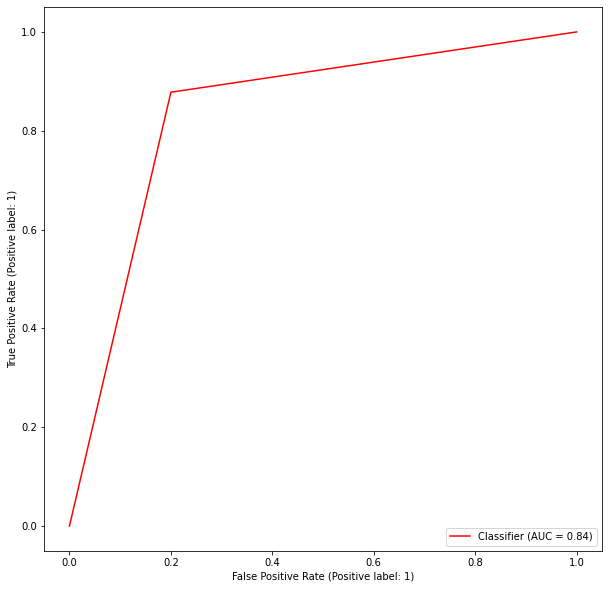

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_predictions(Y, cross_val_predict(clf, X, Y, cv=5), ax=ax, color='r')

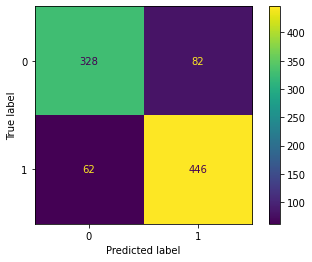

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(Y, cross_val_predict(clf, X, Y, cv=5), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()


### Let's try with PCA (this will run for 10minutes)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

pca = PCA()
clf = RandomForestClassifier(random_state=0)
pipe = Pipeline([('pca', pca), ('randomforestclassifier', clf)])
random_grid = { 'pca__n_components': np.arange(1, 12), # 
                'randomforestclassifier__bootstrap': [True],
                'randomforestclassifier__max_depth': [8, 9, 10, 11],
                'randomforestclassifier__n_estimators': [100, 110, 120],
                'randomforestclassifier__min_samples_split': [5, 6, 7, 8],
                'randomforestclassifier__min_samples_leaf':[1,2,3]
               }
random_clf = RandomizedSearchCV(pipe, random_grid, n_jobs=-1, verbose=2, cv=5, n_iter=100)
random_clf.fit(X, Y)
print(random_clf.best_params_)
print(random_clf.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'randomforestclassifier__n_estimators': 120, 'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__bootstrap': True, 'pca__n_components': 11}
0.8256355428842956


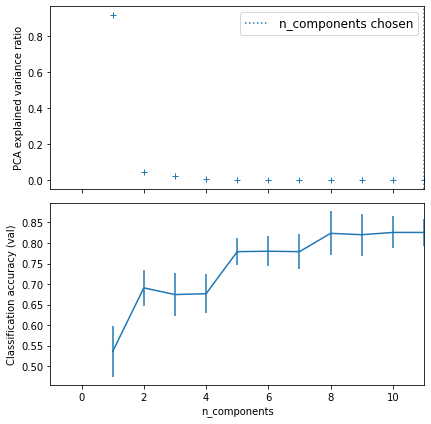

In [ ]:
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    random_clf.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(random_clf.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 11)

plt.tight_layout()
plt.show()

### More componenets -- better accuracy, but We can see that 8 features are enough for predicting the results accurately.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import time

curr_time = time.time()
pca = PCA(n_components=8)
clf = RandomForestClassifier(random_state=0, n_estimators=110, max_depth=8, min_samples_split=7, min_samples_leaf=2, bootstrap=True)
pipe = make_pipeline(pca, clf)

cls = cross_val_score(pipe, X, Y, cv=5)
print("Time", time.time() - curr_time)
print("Score", cls.mean())


## non_pca, same parameters.
# Time 1.0793044567108154
# Score 0.8430506058446188

## pca, 8 components
# Time 1.5529839992523193
# Score 0.8147184604419102

Time 1.584259033203125
Score 0.8147184604419102


### Accuracy has plummeted from 84% to 81%, but training time didn't improve, however, we also counted the time it takes to reduce the dimensionality.

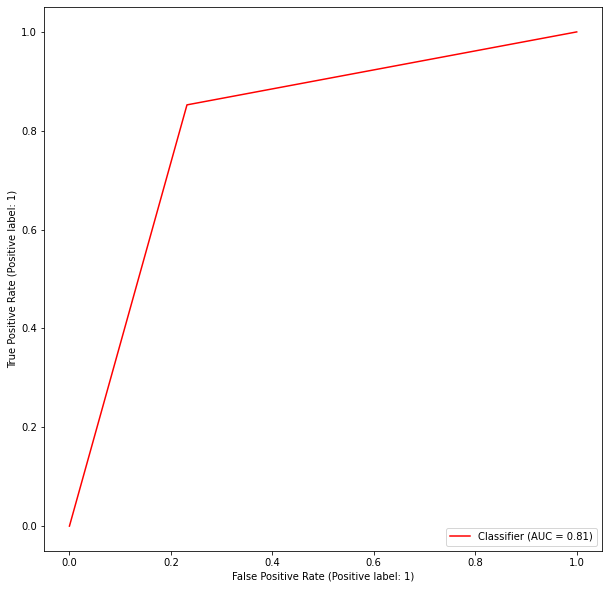

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_predictions(Y, cross_val_predict(pipe, X, Y, cv=5), ax=ax, color='r')

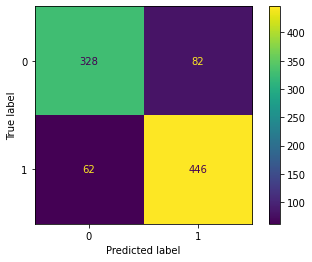

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(Y, cross_val_predict(clf, X, Y, cv=5), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

### In order to visualize the data we will have to have less dimensions.

### Why can't we use plot_boundary function? We have too many features(dimensions), but we can still try. Let's find most important features and train model on them only. (not the best way...)

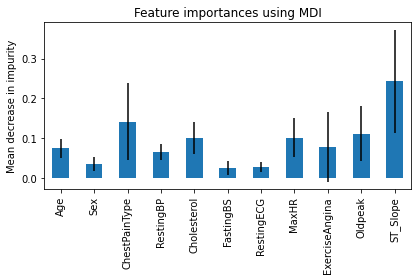

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = random_clf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_clf.best_estimator_.estimators_], axis=0)

feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

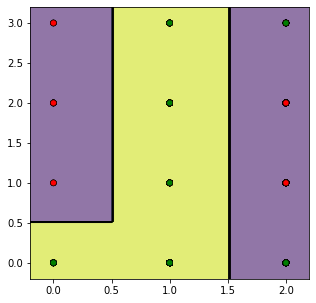

In [ ]:
def plot_boundary(clf, x, y):
    h = 0.02
    x_min, x_max = x[:,0].min() - 10*h, x[:,0].max() + 10*h
    y_min, y_max = x[:,1].min() - 10*h, x[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k', cmap=cmap, linewidths=0.5);

from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

clf = RandomForestClassifier(random_state=0, n_estimators=110, max_depth=8, min_samples_split=7, min_samples_leaf=2, bootstrap=True)
clf.fit(np.array(X[['ST_Slope', 'ChestPainType']]), Y)
plot_boundary(clf, np.array(X[['ST_Slope', 'ChestPainType']]), Y)

### can we try in 3 dimensions?

Text(0.5, 0, 'HeartDisease')

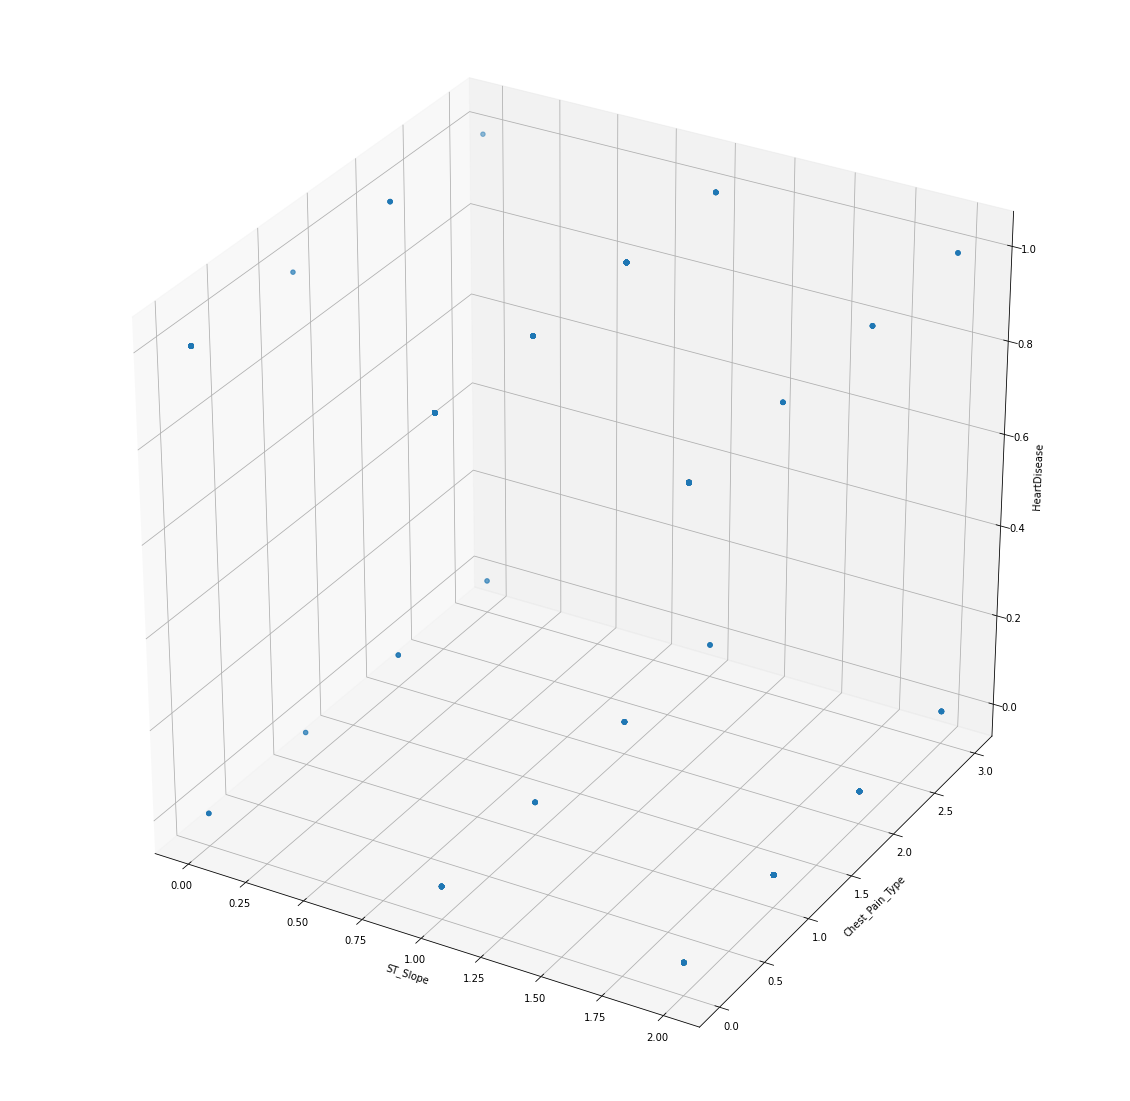

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X['ST_Slope'],X['ChestPainType'],Y,cmap='plasma')
axis.set_xlabel("ST_Slope", fontsize=10)
axis.set_ylabel("Chest_Pain_Type", fontsize=10)
axis.set_zlabel("HeartDisease", fontsize=10)

### Can't understand anything, let's instead use PCA for dimension reduction.

(918, 2)


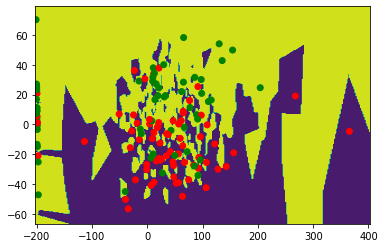

[0.92021836 0.04913303]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

pca = PCA(n_components=2)
X_Train_embedded = pca.fit_transform(X)
print(X_Train_embedded.shape)
model = RandomForestClassifier(random_state=0, n_estimators=110, max_depth=8, min_samples_split=7, min_samples_leaf=2, bootstrap=True).fit(X,Y)
y_predicted = model.predict(X)
# replace the above by your data and model

# create meshgrid
resolution = 300 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[::7,0], X_Train_embedded[::7,1], c=Y[::7], cmap=cmap) # draw every 7th point to see what we have.
plt.show()
print(pca.explained_variance_ratio_)